## Question 5 [Ridge Regression, 25 Marks]

### II. Using R (with no use of special libraries), implement SGD and BGD algorithms that you derived in Step I. The implementation is straightforward as you are allowed to use the code examples from Activity 1 in Module 2.

In [1]:
# auxiliary function to calculate labels based on the estimated coefficients
predict_func <- function(Phi, w){
  return(Phi%*%w)
} 

# auxiliary function to calculate the objective function for the training
train_obj_func <- function (Phi, w, label, lambda){
  # the L2 regulariser is already included in the objective function for training 
  return(mean((predict_func(Phi, w) - label)^2) + .5 * lambda * w %*% w)
}

# auxiliary function to compute the error of the model
get_errors <- function(train_data, test_data, W) {
  n_weights = dim(W)[1]
  errors = matrix(,nrow=n_weights, ncol=2)
  for (tau in 1:n_weights) {
    errors[tau,1] = train_obj_func(train_data$x, W[tau,],train_data$y, 0)
    errors[tau,2] = train_obj_func(test_data$x, W[tau,],test_data$y, 0)
  }
  return(errors)
}

#### SGD

In [2]:
# Stochastic Gradient Descent main function
# refer ot assignment code of question 5
sgd_train <- function(train_x, train_y, lambda, eta, epsilon, max_epoch) {
  
  train_len = dim(train_x)[1]
  tau_max = max_epoch * train_len
  
  W <- matrix(,nrow=tau_max, ncol=ncol(train_x)) 
  W[1,] <- runif(ncol(train_x))
  
  tau = 1 # counter 
  obj_func_val <-matrix(,nrow=tau_max, ncol=1) 
  obj_func_val[tau,1] = train_obj_func(train_x, W[tau,],train_y, lambda)
  
  while (tau <= tau_max){
    
    # check termination criteria
    if (obj_func_val[tau,1]<=epsilon) {break}
    
    # shuffle data:
    train_index <- sample(1:train_len, train_len, replace = FALSE)
    
    # loop over each datapoint
    for (i in train_index) {
      # increment the counter
      tau <- tau + 1
      if (tau > tau_max) {break}
      
      # make the weight update
      y_pred <- predict_func(train_x[i,], W[tau-1,])
      W[tau,] <- sgd_update_weight(W[tau-1,], train_x[i,], train_y[i], y_pred, lambda, eta)
      
      # keep track of the objective funtion
      obj_func_val[tau,1] = train_obj_func(train_x, W[tau,],train_y, lambda)
    }
  }
  # resulting values for the training objective function as well as the weights
  return(list('vals'=obj_func_val,'W'=W))
}

In [3]:
# Stochastic Gradient Descent updating the weight vector
sgd_update_weight <- function(W_prev, x, y_true, y_pred, lambda, eta) {
  # MODIFY THIS FUNCTION FOr L2 REG
  grad = - (y_true-y_pred) * x 
  return(W_prev - eta * (grad+lambda*W_prev))
}

#### BGD

In [4]:
# Batch Gradient Descent main function
# refer to assignment code of question 5
bgd_train <- function(train_x, train_y, lambda, eta, epsilon, max_epoch) {
  
  train_len = dim(train_x)[1]
  
  W <- matrix(,nrow=(max_epoch+1), ncol=ncol(train_x))
  W[1,] <- runif(ncol(train_x))
  
  tau = 1 # counter 
  obj_func_val <-matrix(,nrow=(max_epoch+1), ncol=1)
  obj_func_val[tau,1] = train_obj_func(train_x, W[tau,],train_y, lambda)
  
  trainin_size = dim(train_x)[1]
  for (tau in 1:max_epoch){
    
    # check termination criteria
    if (obj_func_val[tau,1]<=epsilon) {break}
    
    # make prediction over the training set
    y_pred = train_x %*% W[tau,]
    
    # update the weight using linear search
    W[tau+1,] = bgd_update_weight(W[tau,], train_x, train_y, y_pred, lambda, eta)
    
    # keep track of the objective funtion
    obj_func_val[tau+1,1] = train_obj_func(train_x, W[tau+1,],train_y, lambda)
  } 
  # resulting values for the training objective function as well as the weights
  return(list('vals'=obj_func_val,'W'=W))
}


In [5]:
# Batch Gradient Descent updating the weight vector

bgd_update_weight <- function(W_prev, x, y_true, y_pred, lambda, eta) {
  # MODIFY THIS FUNCTION For L2 REG
  grad = -colMeans(matrix((y_true-y_pred),nrow=dim(x)[1],ncol=dim(x)[2]) * x)
  return (W_prev - eta * (grad+lambda*W_prev))
}

### III. Now let’s compare SGD and BGD implementations of ridge regression from Step II:
1. Load Task2A_train.csv and Task2A_test.csv sets.
2. Set the termination criterion as maximum of 18 weight updates for BGD, which is equivalent to 18 x N weight updates for SGD (where N is the number of training data).
3. Run your implementations of SGD and BGD while all parameter settings (initial values, learning rate etc) are exactly the same for both algorithms. During run, record training error rate every time the weights get updated. Create a plot of error rates (use different colors for SGD and BGD), where the x-axis is the number of visited data points and y-axis is the error rate. Save your plot in your Jupyter Notebook file for Question 6. Note that for every N errors for SGD in the plot, you will only have one error for BGD; the total length of the x-axis will be 20 x N.
4. Explain (in your Jupyter Notebook file) your observation based on the errors plot you generated in Part c. Particularly, discuss the convergence speed and the fluctuations you see in the error trends.

In [6]:
# refer to assignment code of question 5
# import library
library(ggplot2)
library(reshape2)
library(corrplot)

# define read_data function
read_data <- function(fname, sc) {
  data <- read.csv(file=fname,head=TRUE,sep=",")
  nr = dim(data)[1]
  nc = dim(data)[2]
  x = data[1:nr,1:(nc-1)]
  y = data[1:nr,nc]
  if (isTRUE(sc)) {
    x = scale(x)
    y = scale(y)
  }
  return (list("x" = x, "y" = y))
}

## reading the data
dtrain = read_data("./Task1C_train.csv", TRUE)
dtest = read_data("./Task1C_test.csv", TRUE)

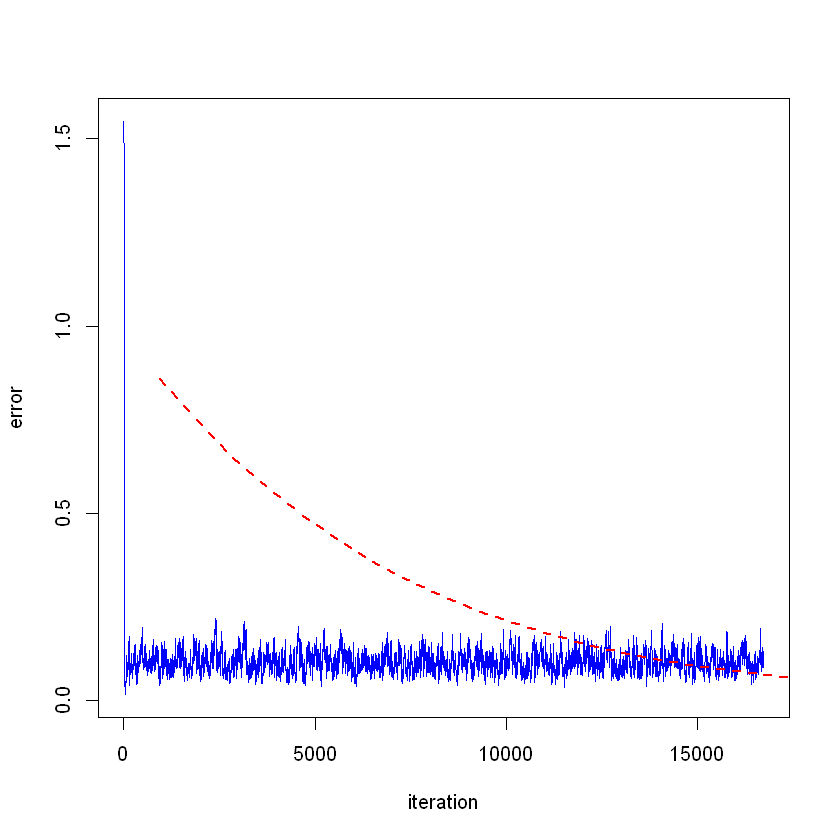

In [8]:
# set parameters for SGD 
max_epoch = 18
epsilon = .001
eta = .01
lambda= 1.5

# set parameters for BGD 
max_epoch = 18
epsilon = .001
eta = .01
lambda= 1.5

# Run SGD 
train_res1 = sgd_train(dtrain$x, dtrain$y, lambda, eta, epsilon, max_epoch)
errors1 = get_errors(dtrain, dtest, train_res1$W) 
options(warn=-1)

# Run BGD
train_res2 = bgd_train(dtrain$x, dtrain$y, lambda, eta, epsilon, max_epoch)
errors2 = get_errors(dtrain, dtest, train_res2$W)
options(warn=-1)
# Create a plot of error rates (SGD is blue and BGD is red), where the x-axis is the number of visited data 
# points and y-axis is the error rate.
plot(errors1[,1], type="l", col="blue", xlab="iteration", ylab="error")
lines(x=seq(1,19)*dim(dtrain$x)[1],y=errors2[,1],type="l", lty=2, lwd=2, col="red")

#### Explaination:
From the plot aboce we can learn:
1. The convergence speed of SGD is much faster than BGD's. The reason is that SGD only select on data point for updating the weights but BGD need to use the all dataset. Thus the computationally of BGD is much high than SGD's and this will happen epcaially in the large scale dataset.
2. The decreasing trends of error rate are different. In SGD algorithm, the error will converge very fast after first few iterations but after that it will fluctuate around some values. It is easy to stunk in local minimun because it only randomly pick one data point for parameters update in every iteration. In practice, the region which SGD flucate around is close to the global minimum. By contrast, BGD can always reach the globalminimun after run enough times of iterations.